In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import netCDF4 as nc4            # to work with netCDFs

# Configs

In [210]:
start_date = '2014-11-01'
end_date = '2018-06-03'
ws='Coweeta'
data_dir  = r"g:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\0_data_preprocessing\raw_data\Coweeta\CHOSEN" #os.getcwd()
output_dir = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\data\Coweeta"

# Read CHOSEN data

## Inspect attributes

In [211]:
ncdf = nc4.Dataset(os.path.join(data_dir, f"{ws}_NetCDF.nc"), 'r')

In [212]:
for v in ncdf.variables:
    print(ncdf.variables[v])

<class 'netCDF4._netCDF4.Variable'>
float64 Datetime(Dim_Datetime)
    range: ['2000-02-26', '2018-10-31']
unlimited dimensions: 
current shape = (6823,)
filling off
<class 'netCDF4._netCDF4.Variable'>
vlen Grid(Dim_Grid)
    Latitude: ['39.15', '', '33.89655', '35.04826', '35.11535', '35.32116', '35.18539', '35.067189', '35.0734', '35.181048', '35.24270', '35.22737', '35.16331', '35.14298', '35.824828', '', '35.069427', '35.054105', '35.069255', '', '35.051459', '35.06131400', '35.067855', '35.056714', '35.068576', '35.0506480', '35.0593010', '35.065818', '35.058029', '35.065977', '35.0493880', '35.0578120', '', '35.667943', '35.667198', '35.666348']
    Longitude: ['-83.37972', '', '-83.362289', '-83.45428', '-83.46619', '-83.79736', '-83.62215', '-83.384413', '-83.16843', '-83.385019', '-83.33727', '-83.45130', '-83.36320', '-83.48930', '-82.555420', '', '-83.437335', '-83.423798', '-83.440717', '', '-83.462251', '-83.47058383', '-83.436667', '-83.426877', '-83.440269', '-83.4606291

In [213]:
start_time = pd.to_datetime(ncdf.variables['Datetime'][:][0])
end_time = pd.to_datetime(ncdf.variables['Datetime'][:][-1])
time_index = pd.date_range(start_time, end_time, freq='D')
time_index
len(time_index)

6823

In [214]:
ncdf.variables["Grid"][:]

array(['Prentiss', 'Coweeta', 'Whitehall', 'CoweetaMid',
       'LowerJonesCreek', 'GrahamCounty', 'WineSpring', 'TessenteeFarm',
       'Cullasaja', 'FranklinCentral', 'FranklinNE', 'FranklinNW',
       'FranklinSE', 'FranklinSW', 'MHOpen', '1039', 'CWT102', 'CWT105',
       'CWT107', 'CWT227', 'CWT132', 'CWT136', 'CWT202', 'CWT205',
       'CWT207', 'CWT232', 'CWT236', 'CWT302', 'CWT305', 'CWT307',
       'CWT332', 'CWT336', 'CWT418', 'BentCreek1', 'BentCreek2',
       'BentCreek3'], dtype=object)

## Define functions

In [215]:
def print_ncdf_info(ncdf, variablename):
    print(ncdf.variables[variablename])

In [216]:
def plot_all_stations(ncdf, variablename):
    ncdf_var = ncdf.variables[variablename]
    name_list = ncdf_var.getncattr('names')
    unit = ncdf_var.getncattr('units')

    # Creating a plot
    plt.figure(figsize=(15, 4))

    # Iterating through each column in the data
    for i in range(ncdf_var.shape[1]):
        # Plotting the data of each column
        plt.plot(ncdf_var[:, i], label=name_list[i], alpha=.5)

    # Adding labels and title
    plt.xlabel("timestep")
    plt.ylabel(unit)
    plt.title(variablename)

    # Adding legend to differentiate the columns
    plt.legend()

    # Displaying the plot
    plt.show()

In [217]:
def get_specific_station_data(ncdf, variablename, station_name):
    ncdf_var = ncdf.variables[variablename]
    name_list = ncdf_var.getncattr('names')
    unit = ncdf_var.getncattr('units')
    # Find the index of "CoweetaMid_Precipitation" within the names_list
    index = name_list.index(f'{station_name}_{variablename}')

    # Get the data for "CoweetaMid_Precipitation"
    data = ncdf_var[:, index]
    plt.figure(figsize=(5, 3))
    plt.plot(data)
    plt.ylabel(unit)
    plt.title(variablename)

    return data

## Read precip data
Get the data from CoweetaMid station (4101) because that's the only station within the basin

<class 'netCDF4._netCDF4.Variable'>
float64 Precipitation(Dim_Datetime, Dim_Precipitation_Grid)
    names: ['Whitehall_Precipitation', 'CoweetaMid_Precipitation', 'LowerJonesCreek_Precipitation', 'GrahamCounty_Precipitation', 'WineSpring_Precipitation', 'TessenteeFarm_Precipitation', 'Cullasaja_Precipitation', 'FranklinCentral_Precipitation', 'FranklinNE_Precipitation', 'FranklinNW_Precipitation', 'FranklinSE_Precipitation', 'FranklinSW_Precipitation', 'MHOpen_Precipitation']
    time: ['2013-04-09', '2018-10-31']
    units: mm/d
    data_source_link: ['http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4102 (Central, NE, NW, SE, SW)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4104 (4104)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4106 (4106)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4107 (4107)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4103 (4103)', 'http://coweeta.uga.edu/dbpublic/data

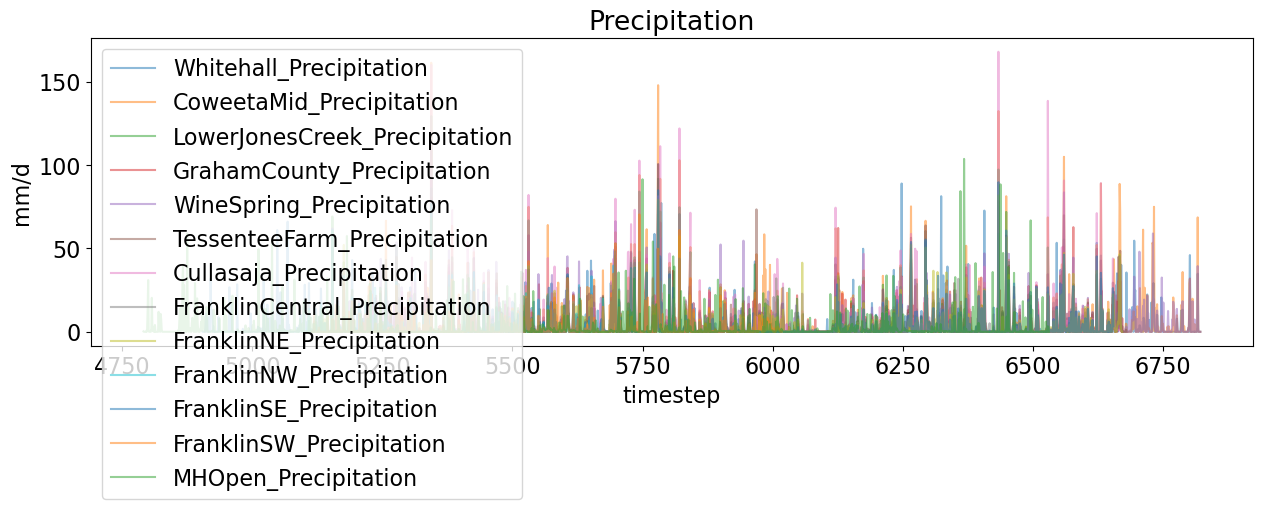

In [218]:
print_ncdf_info(ncdf, 'Precipitation')
plot_all_stations(ncdf, 'Precipitation')

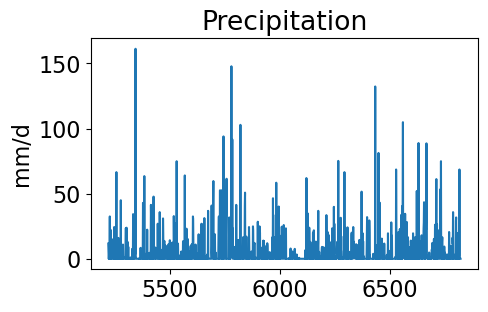

In [219]:
p = get_specific_station_data(ncdf, 'Precipitation', 'CoweetaMid')

## Read PET related data

### Solar Radiation
All of the statations are outside of Coweeta basin. Select the closest one to the coweeta basin & data available (Franklin Central)

<class 'netCDF4._netCDF4.Variable'>
float64 SolarRadiation(Dim_Datetime, Dim_SolarRadiation_Grid)
    names: ['FranklinCentral_SolarRadiation', 'FranklinNE_SolarRadiation', 'FranklinNW_SolarRadiation', 'FranklinSW_SolarRadiation']
    time: ['2014-02-17', '2018-06-03']
    units: W/m2
    data_source_link: http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=1039 (1039)
unlimited dimensions: 
current shape = (6823, 4)
filling off


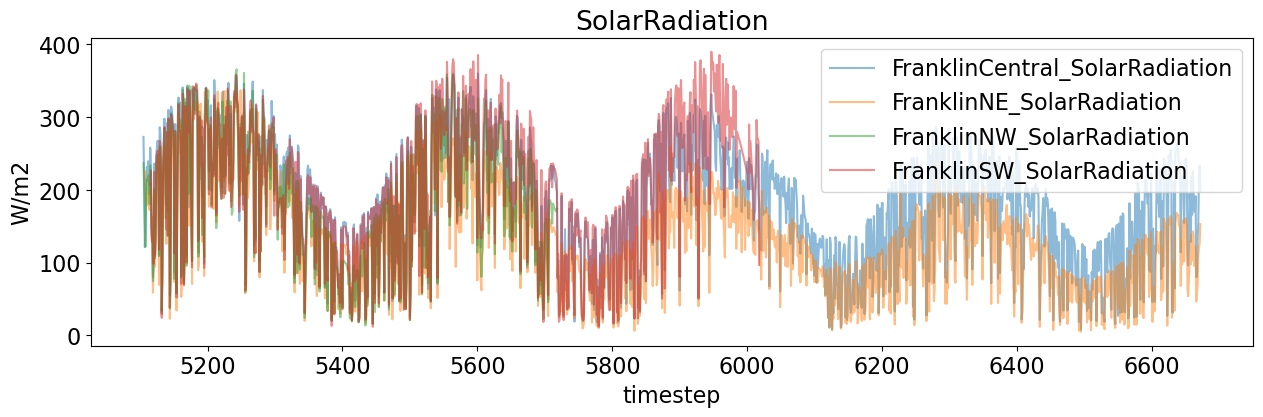

In [220]:
print_ncdf_info(ncdf, 'SolarRadiation')
plot_all_stations(ncdf, 'SolarRadiation')

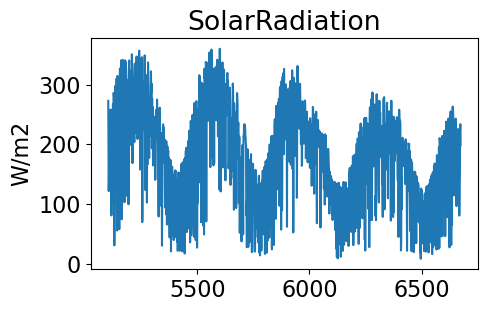

In [221]:
R_s = get_specific_station_data(ncdf, 'SolarRadiation', 'FranklinCentral')

### Relative humidity (RH)
Choose the Coweeta_Mid station

<class 'netCDF4._netCDF4.Variable'>
float64 RelativeHumidity(Dim_Datetime, Dim_RelativeHumidity_Grid)
    names: ['Whitehall_RelativeHumidity', 'CoweetaMid_RelativeHumidity', 'LowerJonesCreek_RelativeHumidity', 'GrahamCounty_RelativeHumidity', 'WineSpring_RelativeHumidity', 'TessenteeFarm_RelativeHumidity', 'Cullasaja_RelativeHumidity', 'FranklinCentral_RelativeHumidity', 'FranklinNE_RelativeHumidity', 'FranklinNW_RelativeHumidity', 'FranklinSE_RelativeHumidity', 'FranklinSW_RelativeHumidity', 'MHOpen_RelativeHumidity']
    time: ['2004-11-02', '2018-10-31']
    units: %
    data_source_link: ['http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4102 (Central, NE, NW, SE, SW)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4104 (4104)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4106 (4106)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4107 (4107)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4103 (410

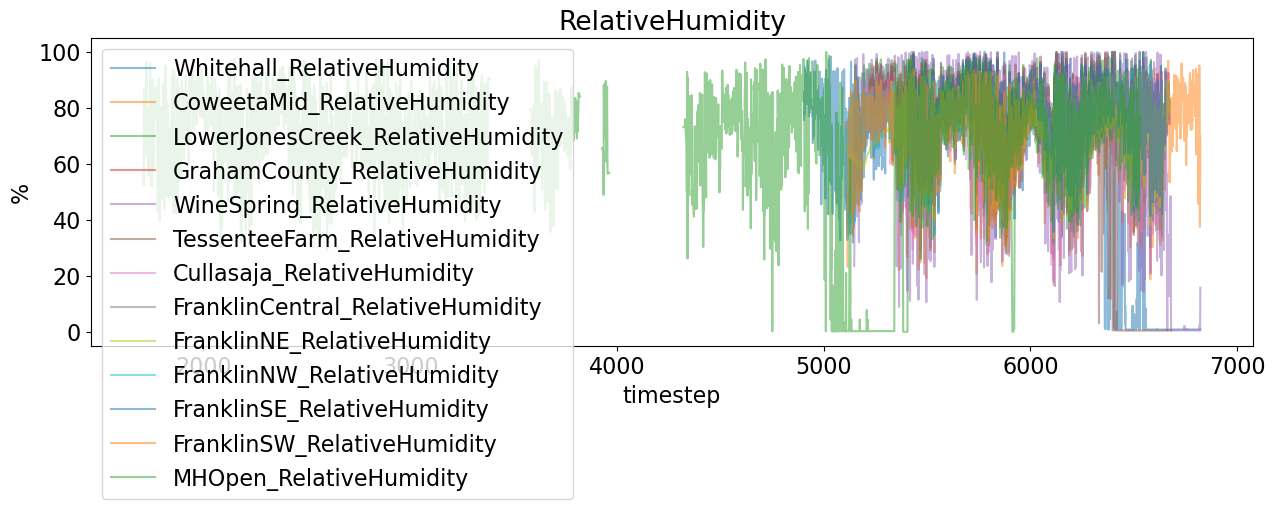

In [222]:
print_ncdf_info(ncdf, 'RelativeHumidity')
plot_all_stations(ncdf, 'RelativeHumidity')

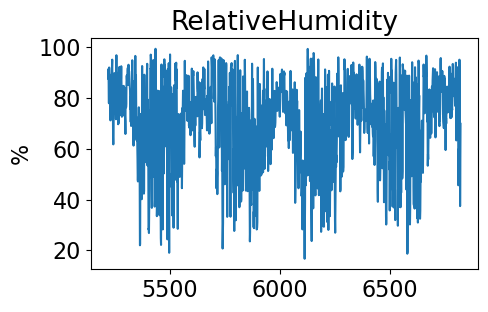

In [223]:
RH = get_specific_station_data(ncdf, 'RelativeHumidity', 'CoweetaMid')

### Wind speed

<class 'netCDF4._netCDF4.Variable'>
float64 WindSpeed(Dim_Datetime, Dim_WindSpeed_Grid)
    names: ['Whitehall_WindSpeed', 'CoweetaMid_WindSpeed', 'LowerJonesCreek_WindSpeed', 'GrahamCounty_WindSpeed', 'WineSpring_WindSpeed', 'TessenteeFarm_WindSpeed', 'Cullasaja_WindSpeed', 'FranklinCentral_WindSpeed', 'FranklinNE_WindSpeed', 'FranklinNW_WindSpeed', 'FranklinSE_WindSpeed', 'FranklinSW_WindSpeed', 'MHOpen_WindSpeed']
    time: ['2013-04-09', '2018-10-31']
    units: m/s
    data_source_link: ['http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4102 (Central, NE, NW, SE, SW)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4104 (4104)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4106 (4106)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4107 (4107)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4103 (4103)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4038 (OpenSite)', 'http://coweeta.u

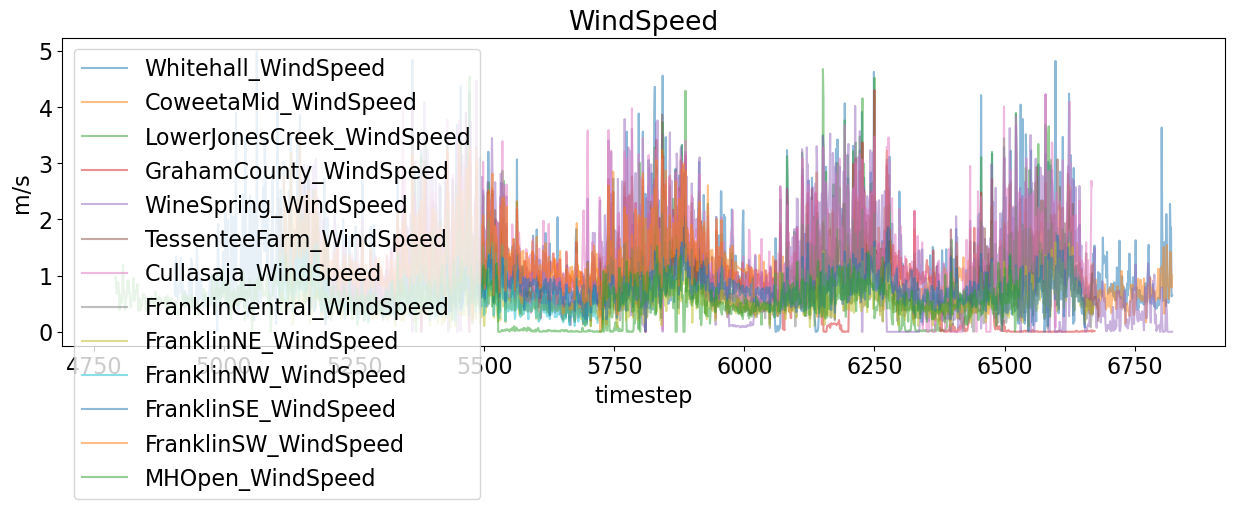

In [224]:
print_ncdf_info(ncdf, 'WindSpeed')
plot_all_stations(ncdf, 'WindSpeed')

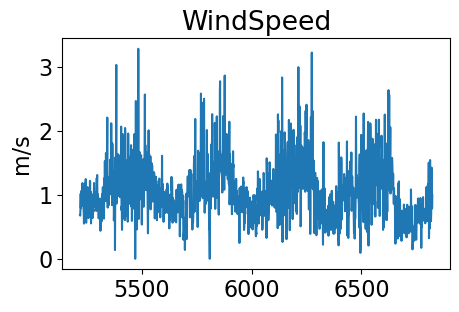

In [225]:
U_z = get_specific_station_data(ncdf, 'WindSpeed', 'CoweetaMid')

### Vapor pressure

<class 'netCDF4._netCDF4.Variable'>
float64 VaporPressure(Dim_Datetime, Dim_VaporPressure_Grid)
    names: 1039_VaporPressure
    time: ['2000-02-26', '2008-01-01']
    units: kPa
    data_source_link: http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=1039 (1039)
unlimited dimensions: 
current shape = (6823, 1)
filling off


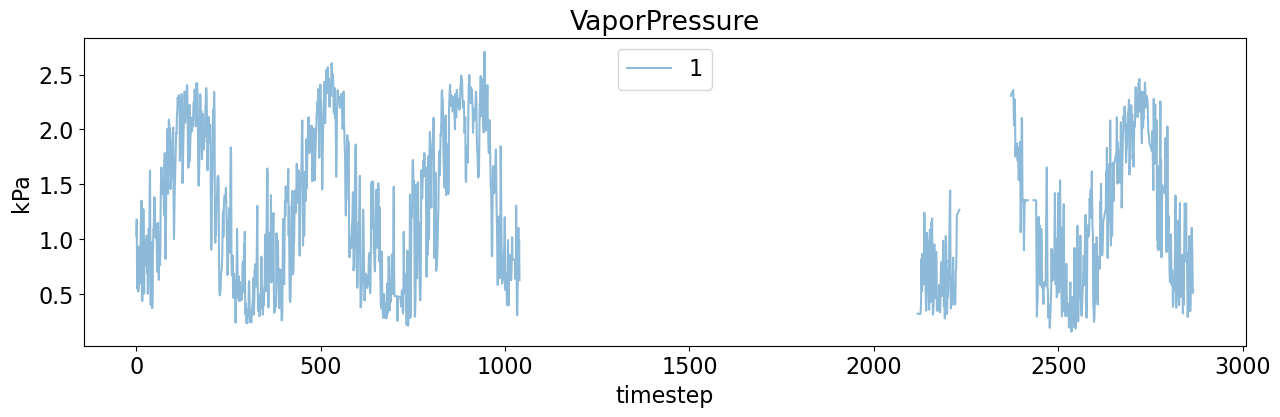

In [226]:
print_ncdf_info(ncdf, 'VaporPressure')
plot_all_stations(ncdf, 'VaporPressure')

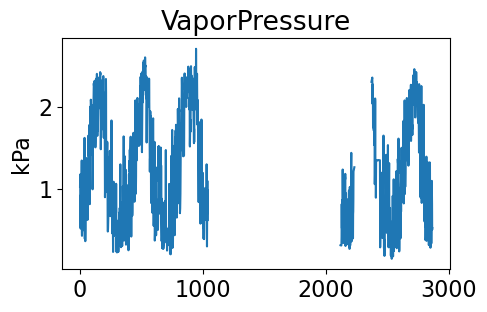

In [227]:
e_a = get_specific_station_data(ncdf, 'VaporPressure', '1039')

### Temperature

<class 'netCDF4._netCDF4.Variable'>
float64 AirTemperature(Dim_Datetime, Dim_AirTemperature_Grid)
    names: ['Whitehall_AirTemperature', 'CoweetaMid_AirTemperature', 'LowerJonesCreek_AirTemperature', 'GrahamCounty_AirTemperature', 'WineSpring_AirTemperature', 'TessenteeFarm_AirTemperature', 'Cullasaja_AirTemperature', 'FranklinCentral_AirTemperature', 'FranklinNE_AirTemperature', 'FranklinNW_AirTemperature', 'FranklinSE_AirTemperature', 'FranklinSW_AirTemperature', 'MHOpen_AirTemperature']
    time: ['2004-11-02', '2018-10-31']
    units: Degree celsius
    data_source_link: ['http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4102 (Central, NE, NW, SE, SW)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4104 (4104)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4106 (4106)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4107 (4107)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4103 (4103)', 'http://cowe

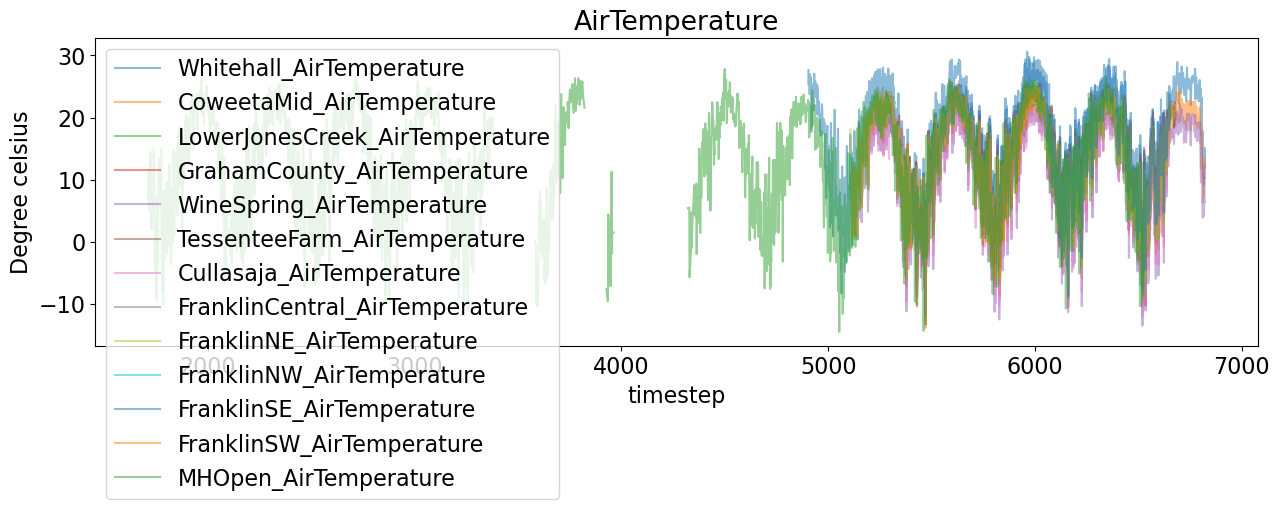

In [228]:
print_ncdf_info(ncdf, 'AirTemperature')
plot_all_stations(ncdf, 'AirTemperature')

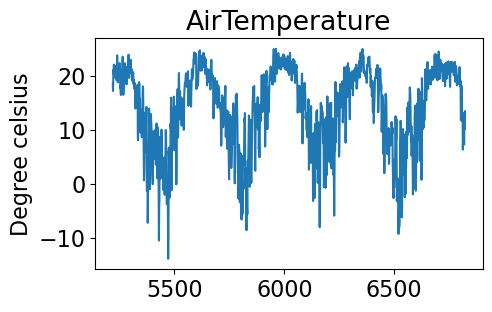

In [229]:
temp = get_specific_station_data(ncdf, 'AirTemperature', 'CoweetaMid')

# Calculate PET

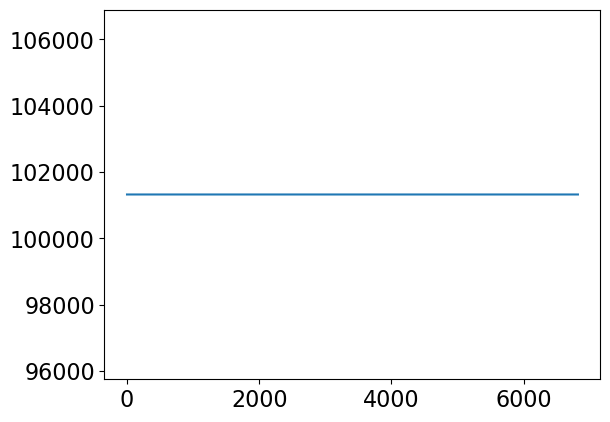

In [230]:
pressure = np.full_like(p, 101325) #Pa
plt.plot(pressure)

In [231]:
pressure
"""

To find the pressure at a specific elevation, you can use the barometric formula if you're considering the atmosphere to be standard. However, for a quick estimate, you can use the following empirical formula:

P=P0×(1−L×hT0)g×MR×LP=P0​×(1−T0​L×h​)R×Lg×M​

Where:

    PP is the pressure at elevation hh
    P0=101325 PaP0​=101325Pa is the standard pressure at sea level
    L=0.0065 K/mL=0.0065K/m is the standard temperature lapse rate
    h=782 mh=782m is the elevation
    T0=288.15 KT0​=288.15K is the standard temperature at sea level
    g=9.80665 m/s2g=9.80665m/s2 is the standard gravity
    M=0.0289644 kg/molM=0.0289644kg/mol is the molar mass of Earth's air
    R=8.31447 J/(mol K)R=8.31447J/(mol K) is the ideal gas constant

Substitute the known values into the equation:

P=101325×(1−0.0065×782288.15)9.80665×0.02896448.31447×0.0065P=101325×(1−288.150.0065×782​)8.31447×0.00659.80665×0.0289644​

Calculate the pressure PP:

P≈101325×(1−0.0176)5.255P≈101325×(1−0.0176)5.255

P≈101325×(0.9824)5.255P≈101325×(0.9824)5.255

P≈101325×0.8355P≈101325×0.8355

P≈84674.13 PaP≈84674.13Pa

So, the approximate pressure at an elevation of 782 meters is 84674.13 Pa84674.13Pa or 84.67 kPa84.67kPa.
"""

"\n\nTo find the pressure at a specific elevation, you can use the barometric formula if you're considering the atmosphere to be standard. However, for a quick estimate, you can use the following empirical formula:\n\nP=P0×(1−L×hT0)g×MR×LP=P0\u200b×(1−T0\u200bL×h\u200b)R×Lg×M\u200b\n\nWhere:\n\n    PP is the pressure at elevation hh\n    P0=101325\u2009PaP0\u200b=101325Pa is the standard pressure at sea level\n    L=0.0065\u2009K/mL=0.0065K/m is the standard temperature lapse rate\n    h=782\u2009mh=782m is the elevation\n    T0=288.15\u2009KT0\u200b=288.15K is the standard temperature at sea level\n    g=9.80665\u2009m/s2g=9.80665m/s2 is the standard gravity\n    M=0.0289644\u2009kg/molM=0.0289644kg/mol is the molar mass of Earth's air\n    R=8.31447\u2009J/(mol K)R=8.31447J/(mol K) is the ideal gas constant\n\nSubstitute the known values into the equation:\n\nP=101325×(1−0.0065×782288.15)9.80665×0.02896448.31447×0.0065P=101325×(1−288.150.0065×782\u200b)8.31447×0.00659.80665×0.0289644

## Unit conversion
Check https://eto.readthedocs.io/en/latest/package_references.html#parameter-estimation

In [232]:
# Pressure 
conversion_to_kilo = 0.001
pressure_kpa = pressure * conversion_to_kilo

# Radiation W/m2 -> MJ/m2
# 1 W/m2 = 0.0864 MJ/m2/day
conversion_Wm2_to_MJm2 = 0.0864 
R_s_MJm2 = R_s * conversion_Wm2_to_MJm2

# vapor pressure (kPa)
# no conversion

# Wind speed (m/s)
# no conversion

# Relative humidity (%) -> (-)
RH_fraction = RH / 100

# Check the period when the data is available

In [233]:
# Need df[["date", "R_s", "P", "T_mean", "e_a", "RH_mean", "U_z"]]
forcings = np.vstack([pressure_kpa, temp, temp, R_s_MJm2, e_a, RH_fraction, U_z]).transpose()
forcings_df = pd.DataFrame(forcings, index=time_index, columns=["P", "T_min", "T_max", "R_s", "e_a", "RH_mean", "U_z"])
forcings_df["date"] = pd.to_datetime(forcings_df.index)
forcings_df.head()

,P,T_min,T_max,R_s,e_a,RH_mean,U_z,date
2000-02-26,101.325,NaN,NaN,NaN,1.030000,NaN,NaN,2000-02-26
2000-02-27,101.325,NaN,NaN,NaN,1.180417,NaN,NaN,2000-02-27
2000-02-28,101.325,NaN,NaN,NaN,0.607083,NaN,NaN,2000-02-28
2000-02-29,101.325,NaN,NaN,NaN,0.546667,NaN,NaN,2000-02-29
2000-03-01,101.325,NaN,NaN,NaN,0.813750,NaN,NaN,2000-03-01


<AxesSubplot:>

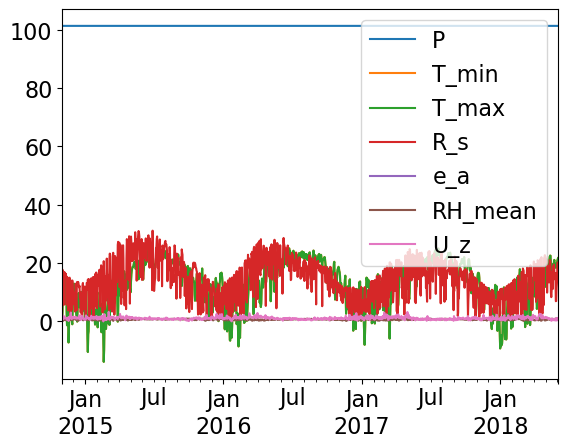

In [234]:
forcings_df[["P","T_min","T_max","R_s","e_a","RH_mean","U_z"]][start_date:end_date].plot()

In [235]:
input_df = forcings_df[["P","T_min","T_max","R_s","RH_mean","U_z", "date"]][start_date:end_date].dropna().copy()
input_df.head()

,P,T_min,T_max,R_s,RH_mean,U_z,date
2014-11-01,101.325,0.657083,0.657083,7.144816,0.698887,2.117500,2014-11-01
2014-11-02,101.325,3.435000,3.435000,17.726987,0.388525,1.286250,2014-11-02
2014-11-03,101.325,9.102917,9.102917,16.937651,0.220167,1.004167,2014-11-03
2014-11-04,101.325,13.154583,13.154583,15.359047,0.224937,1.360417,2014-11-04
2014-11-05,101.325,11.862500,11.862500,5.638637,0.573346,0.838333,2014-11-05


## Calculate PET

In [236]:
import sys
sys.path.append(r'G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\libs\cfe_py')
from fao_pet import FAO_PET
fao_pet = FAO_PET(lat=35.05, lon=-83.43, elevation=726,forcing=input_df)
fao_pet.input_forcing.head()

,P,T_min,T_max,R_s,RH_mean,U_z,date,e_s,e_a
time,,,,,,,,,
2014-11-01,101.325,0.657083,0.657083,7.144816,0.698887,2.117500,2014-11-01,0.640844,0.447878
2014-11-02,101.325,3.435000,3.435000,17.726987,0.388525,1.286250,2014-11-02,0.781738,0.303725
2014-11-03,101.325,9.102917,9.102917,16.937651,0.220167,1.004167,2014-11-03,1.156445,0.254611
2014-11-04,101.325,13.154583,13.154583,15.359047,0.224937,1.360417,2014-11-04,1.513479,0.340438
2014-11-05,101.325,11.862500,11.862500,5.638637,0.573346,0.838333,2014-11-05,1.390353,0.797153


c:\Users\flipl\miniconda3\envs\CFE\lib\site-packages\eto\param_est.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.ts_param['e_a'].loc[self.ts_param['e_a'].isnull()] = (self.ts_param['e_min'][self.ts_param['e_a'].isnull()] * self.ts_param.loc[self.ts_param['e_a'].isnull(), 'RH_max']/100 + self.ts_param['e_max'][self.ts_param['e_a'].isnull()] * self.ts_param.loc[self.ts_param['e_a'].isnull(), 'RH_min']/100)/2
c:\Users\flipl\miniconda3\envs\CFE\lib\site-packages\eto\param_est.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.ts_param['e_a'].loc[self.ts_param['e_a'].isnull()] = self.ts_param.loc[self.t

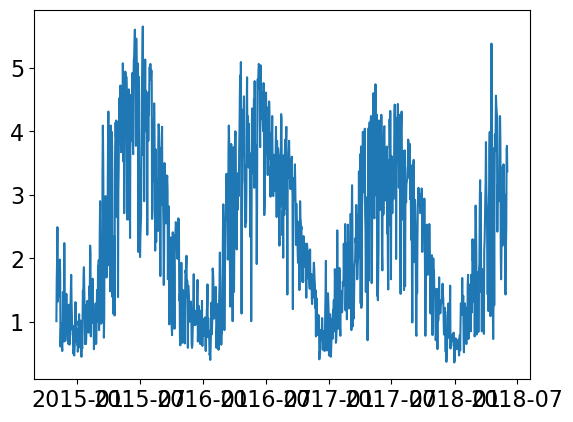

In [237]:
pet = fao_pet.calc_PET()
# Convert to mm/day
plt.plot(pet)

In [238]:
_DailyPET = forcings_df.merge(pet, left_index= True, right_index=True, how='outer')

In [239]:
DailyPET = _DailyPET.ETo_FAO_mm.resample('D').asfreq()
DailyPET.head()

2000-02-26   NaN
2000-02-27   NaN
2000-02-28   NaN
2000-02-29   NaN
2000-03-01   NaN
Freq: D, Name: ETo_FAO_mm, dtype: float64

# Read CHL Flow data
## Discharge data

<AxesSubplot:xlabel='time'>

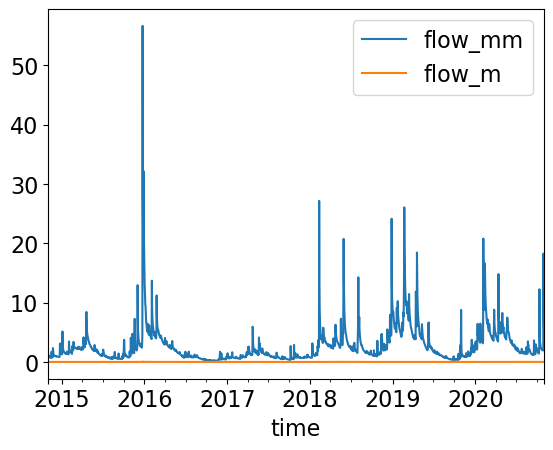

In [240]:
path = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\0_data_preprocessing\raw_data\Coweeta\temp\flow.csv"
q = pd.read_csv(path)
q['time'] = pd.to_datetime(q['time'])
q.set_index('time', inplace=True)
q.plot()

# Get soil moisture data

In [241]:
def get_data(ncdf, variable_names_lst=[]): # variable_names_lst=[] to get all the data
    # ws=watershed[watershed_number-1].split('-')[1]
    # print(ws)
    # File=ws+'_NetCDF.nc'
    # ncdf = nc4.Dataset(path +'/'+ File, 'r')
    keys_lst=list(ncdf.variables.keys())
    len_keys=len(keys_lst)
    print("Hydrometeorological variables in this watershed are:")
    all_variables=keys_lst[2:int(len_keys/2)]
    print(all_variables)
    if variable_names_lst==[]:
        for i,var in enumerate(all_variables):
            print("Reading all variables")
            indexUnique = pd.date_range(str(pd.to_datetime(ncdf.variables['Datetime'][:][0])), 
                                        str(pd.to_datetime(ncdf.variables['Datetime'][:][-1])))  
            var_df=pd.DataFrame(ncdf.variables[var][:], index=indexUnique, 
                                columns = [ncdf.variables[var].names])
            if i==0:
                former_df=var_df
            else:
                former_df=pd.concat([former_df,var_df],axis=1,join='outer')
    else:
        for i,var in enumerate(variable_names_lst):
            print(f"Reading {var}")
            indexUnique = pd.date_range(str(pd.to_datetime(ncdf.variables['Datetime'][:][0])), 
                                        str(pd.to_datetime(ncdf.variables['Datetime'][:][-1])))  
            
            if ncdf.variables[var][:].shape[1]==1:
                var_df=pd.DataFrame(ncdf.variables[var][:], index=indexUnique, columns = [ncdf.variables[var].names])
            else:
                var_df=pd.DataFrame(ncdf.variables[var][:], index=indexUnique, columns = ncdf.variables[var].names)
            
            if i==0:
                former_df=var_df
            else:
                former_df=pd.concat([former_df,var_df],axis=1,join='outer')      
    former_df.index.rename('DateTime',inplace = True)
    return former_df

Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'VaporPressure', 'SoilMoisture']
Reading SoilMoisture


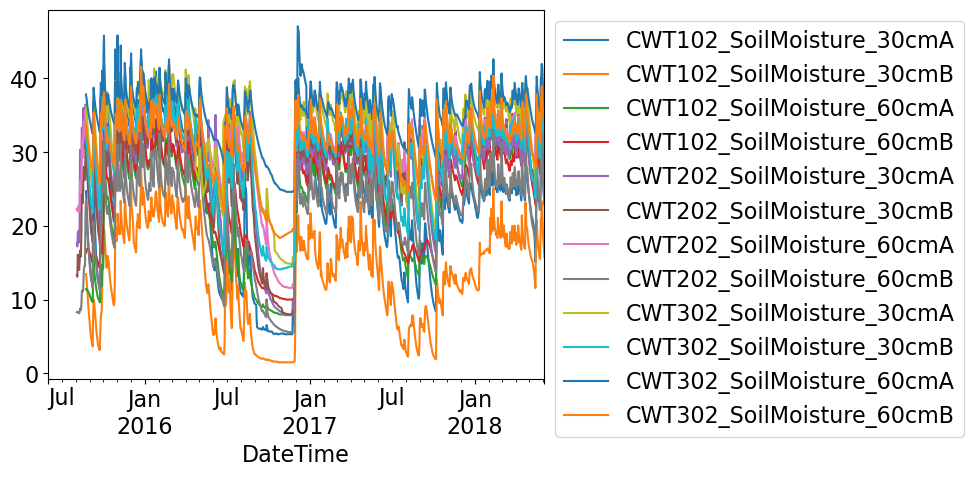

In [242]:
df_sm =get_data(ncdf,["SoilMoisture"])
ax = df_sm.filter(like='CWT102', axis=1).plot()
df_sm.filter(like='CWT202', axis=1).plot(ax=ax)
df_sm.filter(like='CWT302', axis=1).plot(ax=ax)
ax.set_xlim(['2015-06-01', end_date])
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Finalize

## Unit conversion

In [243]:
m_to_mm = 1000
mm_to_m = 1/m_to_mm
km_to_m = 1000
m_to_km = 1/km_to_m

In [244]:
_p_m = p * mm_to_m
q_m = q["flow_mm"] * mm_to_m
pet_m = DailyPET * mm_to_m

In [245]:
p_m = pd.DataFrame(_p_m, index=DailyPET.index)
p_m

,0
2000-02-26,NaN
2000-02-27,NaN
2000-02-28,NaN
2000-02-29,NaN
2000-03-01,NaN
...,...
2018-10-27,0.000254
2018-10-28,0.000000
2018-10-29,0.000000
2018-10-30,0.000000


## Concat all the data

In [246]:
output_forcing_df = pd.DataFrame()
output_forcing_df["PET"] = pet_m.copy()
output_forcing_df["precip_rate"] = p_m
output_forcing_df.rename_axis("time", inplace=True)
output_forcing_df


,PET,precip_rate
time,,
2000-02-26,NaN,NaN
2000-02-27,NaN,NaN
2000-02-28,NaN,NaN
2000-02-29,NaN,NaN
2000-03-01,NaN,NaN
...,...,...
2018-10-27,NaN,0.000254
2018-10-28,NaN,0.000000
2018-10-29,NaN,0.000000


In [247]:
area_km2 = 0.1210

In [248]:
_output_testdata = pd.DataFrame()
_output_testdata["Flow"] = q_m.copy().asfreq('D')
_output_testdata["Rainfall"] = p_m.copy()
_output_testdata["Soil Moisture Content"] = 0
_output_testdata["Direct Runoff"] = 0
_output_testdata["GIUH Runoff"] = 0
_output_testdata["Lateral Flow"] = 0
_output_testdata["Base Flow"] = 0
_output_testdata["Total Discharge"] = q_m.copy().asfreq('D') * (area_km2 * (km_to_m**2))
output_testdata = _output_testdata.copy()
output_testdata["Timestep"] = range(len(output_testdata))
output_testdata.rename_axis("Time", inplace=True)
output_testdata

,Flow,Rainfall,Soil Moisture Content,Direct Runoff,GIUH Runoff,Lateral Flow,Base Flow,Total Discharge,Timestep
Time,,,,,,,,,
2014-11-01,0.000860,0.0,0,0,0,0,0,104.013,0
2014-11-02,0.000964,0.0,0,0,0,0,0,116.586,1
2014-11-03,0.001077,0.0,0,0,0,0,0,130.302,2
2014-11-04,0.001067,0.0,0,0,0,0,0,129.159,3
2014-11-05,0.000992,0.0,0,0,0,0,0,120.015,4
...,...,...,...,...,...,...,...,...,...
2020-10-27,0.001908,NaN,0,0,0,0,0,230.886,2187
2020-10-28,0.002598,NaN,0,0,0,0,0,314.325,2188
2020-10-29,0.018250,NaN,0,0,0,0,0,2208.276,2189


## Save

In [249]:
file_path = os.path.join(output_dir, "forcing_daily_2014_2018.csv")
output_forcing_df[start_date:end_date].to_csv(file_path)

In [250]:
output_testdata[start_date:end_date].to_csv(os.path.join(output_dir, "test_daily_2014_2018_sm_basinavg.csv"))

In [251]:
print(len(output_forcing_df[start_date:end_date]))
output_forcing_df[start_date:end_date].head()

1311


,PET,precip_rate
time,,
2014-11-01,0.00101,0.0
2014-11-02,0.00166,0.0
2014-11-03,0.00194,0.0
2014-11-04,0.00249,0.0
2014-11-05,0.00132,0.0


In [252]:
print(len(output_testdata[start_date:end_date]))
output_testdata[start_date:end_date].head()

1311


,Flow,Rainfall,Soil Moisture Content,Direct Runoff,GIUH Runoff,Lateral Flow,Base Flow,Total Discharge,Timestep
Time,,,,,,,,,
2014-11-01,0.000860,0.0,0,0,0,0,0,104.013,0
2014-11-02,0.000964,0.0,0,0,0,0,0,116.586,1
2014-11-03,0.001077,0.0,0,0,0,0,0,130.302,2
2014-11-04,0.001067,0.0,0,0,0,0,0,129.159,3
2014-11-05,0.000992,0.0,0,0,0,0,0,120.015,4
